<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">SUPERVISED LEARNING REGRESSION MINI PROJECT </h1>
     


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE



<h2 class="list-group-item list-group-item-action active" >1. Read the dataset likes.csv </h2>

In [3]:
df_likes=pd.read_csv('D:\\Great learning\\Course\\Projects\\SLR-Mini - Question\\Likes.csv')
df_likes.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,1098638,13,2,2000,2,male,0,0,0,1,0,0,0,1,0
1,2063204,14,22,1999,1,male,104,0,0,1,0,0,0,1,0
2,1579594,19,18,1994,10,female,212,0,0,1,0,0,0,1,0
3,1979672,21,1,1992,1,male,328,0,0,1,0,0,0,1,0
4,1344831,23,10,1990,2,male,580,0,0,1,0,0,0,1,0


In [6]:
df_likes.shape

(2104, 15)

In [7]:
df_likes.dtypes

userid                    int64
age                       int64
dob_day                   int64
dob_year                  int64
dob_month                 int64
gender                   object
tenure                    int64
friend_count              int64
friendships_initiated     int64
likes                     int64
likes_received            int64
mobile_likes              int64
mobile_likes_received     int64
www_likes                 int64
www_likes_received        int64
dtype: object

In [12]:
df_likes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   userid                 2104 non-null   int64 
 1   age                    2104 non-null   int64 
 2   dob_day                2104 non-null   int64 
 3   dob_year               2104 non-null   int64 
 4   dob_month              2104 non-null   int64 
 5   gender                 2102 non-null   object
 6   tenure                 2104 non-null   int64 
 7   friend_count           2104 non-null   int64 
 8   friendships_initiated  2104 non-null   int64 
 9   likes                  2104 non-null   int64 
 10  likes_received         2104 non-null   int64 
 11  mobile_likes           2104 non-null   int64 
 12  mobile_likes_received  2104 non-null   int64 
 13  www_likes              2104 non-null   int64 
 14  www_likes_received     2104 non-null   int64 
dtypes: int64(14), object(

In [14]:
df_likes.describe().T

,count,mean,std,min,25%,50%,75%,max
userid,2104.0,1.591984e+06,344462.706711,1000738.0,1295331.25,1584463.0,1883310.50,2193411.0
age,2104.0,3.342728e+01,16.155287,13.0,22.00,28.0,41.25,108.0
dob_day,2104.0,1.314496e+01,9.242513,1.0,4.75,12.5,21.00,31.0
dob_year,2104.0,1.979573e+03,16.155287,1905.0,1971.75,1985.0,1991.00,2000.0
dob_month,2104.0,5.882605e+00,3.698839,1.0,2.00,6.0,9.00,12.0
tenure,2104.0,2.747010e+02,297.508563,0.0,54.00,191.0,387.00,2303.0
friend_count,2104.0,2.039924e+00,1.397070,0.0,1.00,2.0,3.00,5.0
friendships_initiated,2104.0,1.453422e+00,1.242272,0.0,1.00,1.0,2.00,5.0
likes,2104.0,2.765447e+01,169.454213,1.0,1.00,4.0,14.00,5937.0
likes_received,2104.0,7.934886e+00,44.784909,0.0,0.00,1.0,3.00,1326.0


<h2 class="list-group-item list-group-item-action active" >2. Basic EDA to understand dataset </h2>

>### 1.  Select more than five columns for EDA

 Step1: Each plot must Use the subplots 
 
             Plot 1: Histogram or bar, line and use suitable plots
             
             Plot2: Box plot 
             
 Step2: Write the inference is it data skewed or not

 Step3: Write the inference is it data having  outliers  or not



>### 2.  Plot the heat map 
             
  Step1: Write the inference on the dependent variable and independent variable having the most (Positive and Negative) correlation columns 


  Step2: Write the inference on the correlation among independent variables

In [26]:
#1)
six_feat=df_likes.iloc[:,6:12]
six_feat

,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes
0,0,0,0,1,0,0
1,104,0,0,1,0,0
2,212,0,0,1,0,0
3,328,0,0,1,0,0
4,580,0,0,1,0,0
...,...,...,...,...,...,...
2099,304,5,2,1,2,1
2100,12,5,1,1,4,1
2101,128,5,5,1,3,1
2102,52,5,5,1,9,1


C:\Users\Sharon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sharon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sharon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sharon\ana

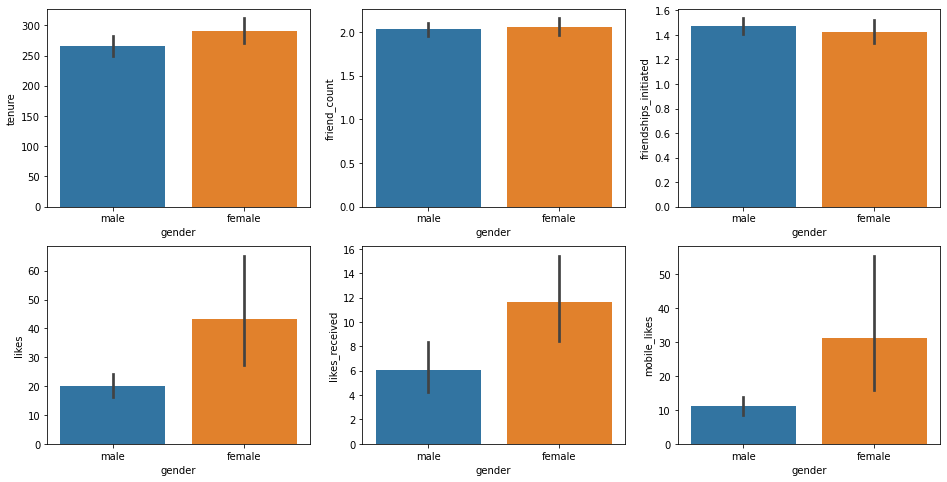

In [28]:
fig,ax=plt.subplots(nrows=2,ncols=3,figsize=(16,8))

for variable,subplot in zip(six_feat.columns,ax.flatten()):
    z=sns.barplot(df_likes['gender'],six_feat[variable],ax=subplot)
    

C:\Users\Sharon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sharon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sharon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sharon\ana

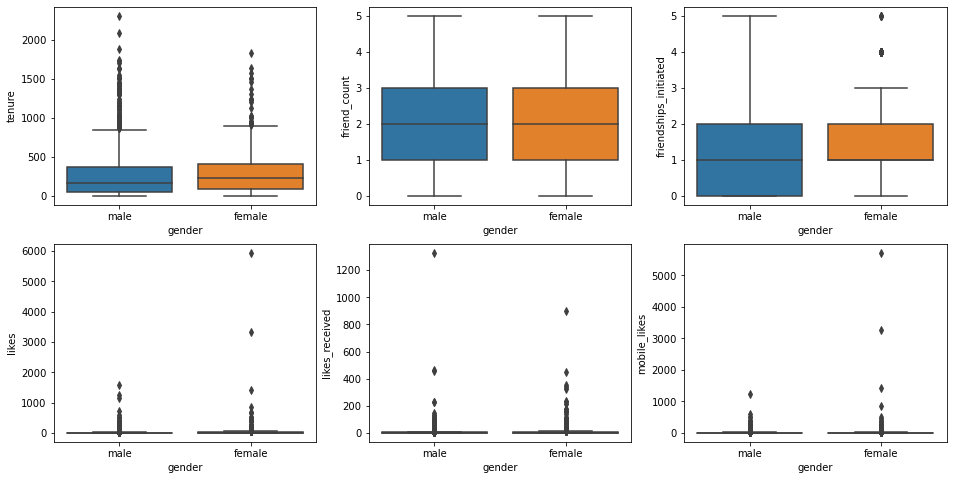

In [29]:
fig,ax=plt.subplots(nrows=2,ncols=3,figsize=(16,8))

for variable,subplot in zip(six_feat.columns,ax.flatten()):
    z=sns.boxplot(df_likes['gender'],six_feat[variable],ax=subplot)
    

In [ ]:
#Here, all columns have outliers other than column friend_count

array([[<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'friend_count'}>],
       [<AxesSubplot:title={'center':'friendships_initiated'}>,
        <AxesSubplot:title={'center':'likes'}>],
       [<AxesSubplot:title={'center':'likes_received'}>,
        <AxesSubplot:title={'center':'mobile_likes'}>]], dtype=object)

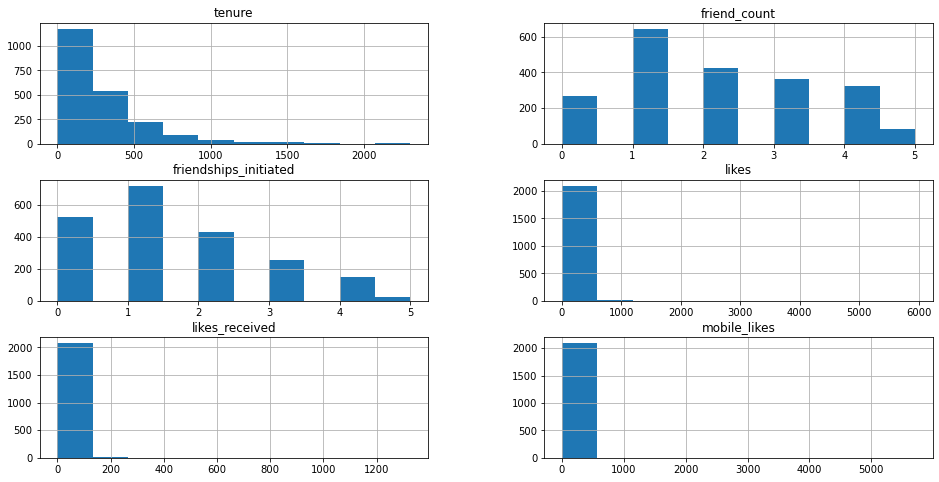

In [36]:
six_feat.hist(figsize=(16,8))

In [ ]:
#Yes, the data has right skewed.

<AxesSubplot:>

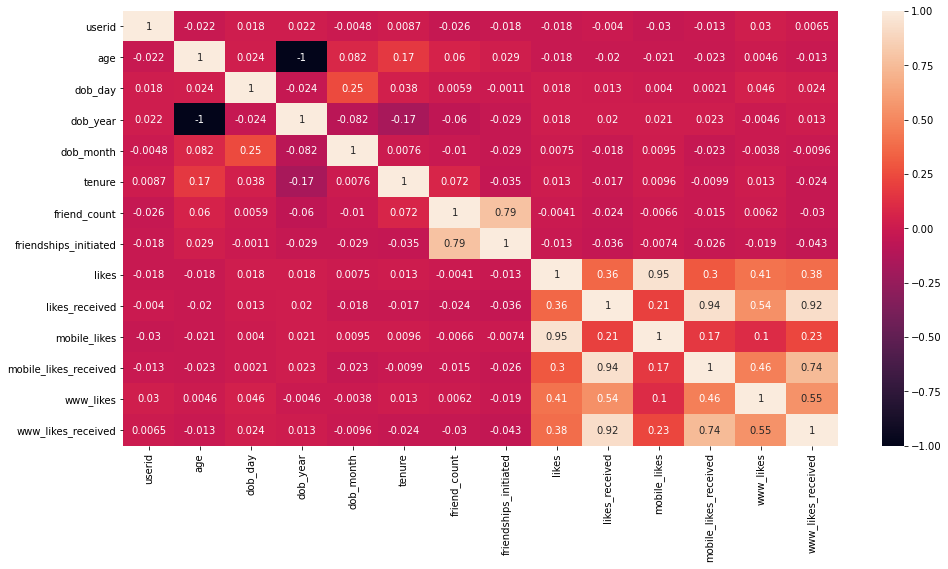

In [134]:
#2)
plt.figure(figsize=(16,8))
sns.heatmap(df_likes.corr(),annot=True)

In [ ]:
#Independent variable mobile_likes_received and dependent variable likes have high positive correlation.
#Independent variable friendship_initiated and dependent variable likes have weak negative correlation

In [ ]:
#Likes received and mobile likes received,friend count and friendships initiated have high positive correlation.
#dob year and age have strong negative correlation.

<h2 class="list-group-item list-group-item-action active" >3.Split dataset into train and test,Scaling    </h2>

>### 1. Split the dataset in dependent variable is [`likes`] and independent

>### 2. Convert categorical variables to numeric variables

>### 3. Scale the features 

>### 4. Split dataset into train(70%) and test(30%).How would you ascertain this statistically? 
 

In [54]:
X=df_likes.iloc[:,[0,1,2,3,4,7,8,11,12,13,14]]    
encoded=pd.get_dummies(df_likes['gender'])
X=pd.concat([X,encoded],axis=1)
y=df_likes['likes']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1472, 13)
(632, 13)
(1472,)
(632,)


<h2 class="list-group-item list-group-item-action active" >4.Model Building and Feature Selection using RFE(Recursive feature elimination)   </h2>

>### 1. Use Linear Regression

>### 2. Evaluation metrics like Rsqaure,Standard error/RMSE. Write the inference.

>### 3. Feature selection using RFE

Step1: Check the optimal number of features between 4 to 30

Step2: RFE with n features(LinearRegression) 

Step3: Specify the number of features

Step4: Fit with n features

Step5: Select features selected by rfe_n      

Step6:Training & test data for n selected columns        

Step7: Add a constant to the model       

Step8:Fit the ols model with n features

Step9: Calculate evaluation metrics

Step 10: Plot r2 and RMSE against n_features  

Step11: Write your final inference.    




>### 4. Model Bulding with optimal features count



In [92]:
#1,2
linreg=LinearRegression()
linreg=linreg.fit(X_train,y_train)
ypredict=linreg.predict(X_train)
mse=mean_squared_error(ypredict,y_train)
rmse=np.sqrt(mse)
rsquare=linreg.score(X_train,y_train)
print('RMSE:', rmse)
print('Rsquare', rsquare)

RMSE: 4.521869315929245e-13
Rsquare 1.0


In [93]:
#3
linreg=LinearRegression()
rfe=RFE(estimator=linreg,n_features_to_select=4)
rfe.fit(X_train,y_train)
feat=pd.Series(rfe.ranking_,X.columns)
significant_feat=feat[feat==1].index
significant_feat

Index(['friend_count', 'friendships_initiated', 'mobile_likes', 'www_likes'], dtype='object')

In [106]:
new_X=df_likes[significant_feat]
y=df_likes['likes']
new_X_train,new_X_test,new_y_train,new_y_test=train_test_split(new_X,y,test_size=0.30,random_state=1)
new_X=sm.add_constant(X)
MLR_model_sig=sm.OLS(y,X).fit()
MLR_model_sig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.226e+29
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:57:30   Log-Likelihood:                 51876.
No. Observations:                2104   AIC:                        -1.037e+05
Df Residuals:                    2091   BIC:                        -1.037e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
userid                 -1.33e-17   3.02e-19    -44.072      0.000   -1.39e-17   -1.27e-17
age                    3.331e-16   6.55e-15      0.051      0.959   -1.25e-14    1.32e-14
dob_day                2.567e-15   1.16e-14      0.221      0.825   -2.02e-14    2.53e-14
dob_year               1.125e-14    1.7e-15      6.638      0.000    7.93e-15    1.46e-14
dob_month              5.551e-17   2.91e-14      0.002      0.998   -5.69e-14    5.71e-14
friend_count          -3.997e-15   1.21e-13     -0.033      0.974   -2.41e-13    2.33e-13
friendships_initiated  1.776e-15   1.36e-13      0.013      0.990   -2.65e-13    2.68e-13
mobile_likes              1.0000   6.87e-16   1.45e+15      0.000       1.000       1.000
mobile_likes_received   1.11e-16   6.04e-15      0.018      0.985   -1.17e-14    1.19e-14
www_likes                 1.0000   2.33e-15   4.29e+14      0.000       1.000       1.000
www_likes_received    -4.441e-16   7.57e-15     -0.059      0.953   -1.53e-14    1.44e-14
female                 1.954e-14   3.37e-12      0.006      0.995    -6.6e-12    6.64e-12
male                   1.421e-14   3.37e-12      0.004      0.997    -6.6e-12    6.63e-12
==============================================================================
Omnibus:                     1030.262   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.885
Skew:                           0.017   Prob(JB):                     3.07e-25
Kurtosis:                       1.866   Cond. No.                     7.49e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
predict=linreg.predict(new_X_train)
mse=mean_squared_error(new_y_train,predict)
rmse=np.sqrt(mse)
print('RMSE:',rmse)
print('r2:',linreg.score(new_X_train,new_y_train))

RMSE: 1.7745801179702873e-13
r2: 1.0


In [94]:
#4)
new_feat=X_train[significant_feat]
linreg.fit(new_feat,y_train)
rfe_score=linreg.score(new_feat,y_train)
rfe_score

1.0

<h2 class="list-group-item list-group-item-action active" >5.Linear Regression Assumptions Validation</h2>


>### 1. Linearity of the model
>### 2. Homoscedasticity (equal variance) of residuals
>### 3. Normality of residuals 
>### 4. Identifying Outliers/influential Cases

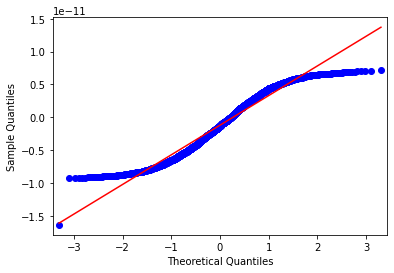

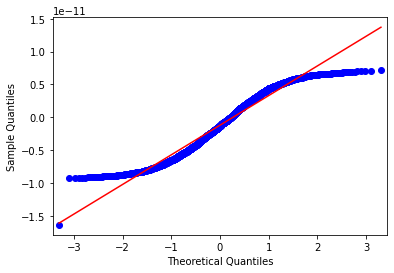

In [119]:
qqplot(MLR_model_sig.resid,line='r')

<h2 class="list-group-item list-group-item-action active" >6.Rebuilding the Model: Feature Selection using RFE & K-Fold Cross Validation</h2>


>### A. Finding optimal feature count using RFE and plot the r2 and RMSE against n_features.

>### B. K-Fold Cross Validation

In [132]:
#A)
print('Count of optimal feature(RFE): ',np.count_nonzero(significant_feat))

Count of optimal feature(RFE):  4


In [138]:
#B)
scores=cross_val_score(estimator=linreg,X=X_train,y=y_train,cv=5,scoring='r2')
print('KFold Cross Validation:',scores)

KFold Cross Validation: [1. 1. 1. 1. 1.]
